In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.offsetbox import AnchoredText
import pandas as pd
import numpy as np
from Color import *
from operator import truediv, sub
from matplotlib.lines import Line2D
from matplotlib.ticker import FormatStrFormatter

# Matplotlib font configuration
from MatplotlibFonts import *

# Helpers
from BrokenPlot import *

# Change the font size
rcParams.update({"font.size": 13})

In [3]:
%reload_ext autoreload
from BenchmarkConfiguration import *
from Color import *

In [4]:
RESULT_DIR='../benchmarks/logs'

In [5]:
Benchmarks = [
    'coremark',
    'picojpeg',
    'aes',
    'crc',
    'dijkstra',
    'sha',
    'adpcm',
    'quicksort',
    'towers'
]

BaseConfigurations = [
    'nacho_naive',
    'nacho_pw',
    'nacho_stcont',
    'nacho_pw_st',
    'nacho_pw_stcont',
    'nacho_clank',
    'prowl',
    'clank',
    'plain_c'
]

CacheConfigurations = [
    'None',
    '256-2',
    '256-4',
    '512-2',
    '512-4',
    '1024-2',
    '1024-4'
]

In [6]:
# Load all the results into a dictionary

default_opt_level = "-Os"

def loadResult(Results, benchmark, config, cache, power_failure_params='-0-0', midfix='-uninstrumented-run-', opt_lvl=default_opt_level):
    if cache == '0-0':
        filename = RESULT_DIR + '/' + benchmark + midfix + config + power_failure_params + opt_lvl + '-final'
    else:
        filename = RESULT_DIR + '/' + benchmark + midfix + config + '-' + cache + power_failure_params + opt_lvl + '-final'
    
    if config not in Results[benchmark]:
        Results[benchmark][config] = {}
    
    print(filename)
    
    # Add the results
    if (power_failure_params == '-0-0' or power_failure_params == '') and opt_lvl == default_opt_level:
        Results[benchmark][config][cache] = dict(pd.read_csv(filename, delimiter=":", header = None).values)
    elif (power_failure_params == '-0-0' or power_failure_params == '') and opt_lvl != default_opt_level:
        Results[benchmark][config][cache+opt_lvl] = dict(pd.read_csv(filename, delimiter=":", header = None).values)
    else:
        Results[benchmark][config][cache + power_failure_params + "-final"] = dict(pd.read_csv(filename, delimiter=":", header = None).values)

Results = {}


def getPostfix(pfc, checkpoint_freq=-1):
    if checkpoint_freq == -1:
        checkpoint_freq = pfc // 2
    return '-' + str(checkpoint_freq) + '-' + str(pfc)



power_failure_cycles = [
    250000,
    500000,
    2500000,
    5000000,
    25000000,
]
power_failure_cache = '512-2'

for benchmark in Benchmarks:
    Results[benchmark] = {}

    # Load Nacho results
    nacho_caches = [
        '256-2',
        #'256-4',
        '512-2',
        #'512-4',
        #'1024-2',
        #'1024-4'
    ]
    for cache in nacho_caches:
        loadResult(Results, benchmark, 'nacho_naive', cache)
        loadResult(Results, benchmark, 'nacho_pw', cache)
        loadResult(Results, benchmark, 'nacho_stcont', cache)
        loadResult(Results, benchmark, 'nacho_pw_st', cache)
        loadResult(Results, benchmark, 'nacho_pw_stcont', cache)
        loadResult(Results, benchmark, 'nacho_clank', cache)

    # Load Prowl results
    prowl_caches = [
        '256-2',
        '512-2',
        #'1024-2',
    ]
    for cache in prowl_caches:
        loadResult(Results, benchmark, 'prowl', cache)

    # Load Clank results
    loadResult(Results, benchmark, 'clank', '0-0')

    # Load plain C results
    loadResult(Results, benchmark, 'plain_c', '0-0', '')

    # ReplayCache comparison
    loadResult(Results, benchmark, 'replay_cache_baseline', '8192-2')

    # Load Prowl results
    replay_cache_caches = [
        '256-2',
        '512-2',
        # '1024-2',
        '8192-2'
    ]
    for cache in replay_cache_caches:
        loadResult(Results, benchmark, 'replay_cache', cache, midfix="-replay-cache-run-")

    for pfc in power_failure_cycles:
        loadResult(Results, benchmark, 'clank', '0-0', getPostfix(pfc))
        loadResult(Results, benchmark, 'prowl', power_failure_cache, getPostfix(pfc))
        loadResult(Results, benchmark, 'replay_cache', power_failure_cache, getPostfix(pfc, 0), "-replay-cache-run-")
        loadResult(Results, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(pfc))

    opt_levels = [
        '-O1',
        '-O2',
        '-O3'
    ]
    for opt_level in opt_levels:
        loadResult(Results, benchmark, 'plain_c', '0-0', '', opt_lvl=opt_level)
        loadResult(Results, benchmark, 'clank', '0-0', opt_lvl=opt_level)
        loadResult(Results, benchmark, 'prowl', power_failure_cache, opt_lvl=opt_level)
        loadResult(Results, benchmark, 'replay_cache', power_failure_cache, midfix="-replay-cache-run-", opt_lvl=opt_level)
        loadResult(Results, benchmark, 'nacho_pw_stcont', power_failure_cache, opt_lvl=opt_level)

Results['picojpeg']['clank']


../benchmarks/logs/coremark-uninstrumented-run-nacho_naive-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_stcont-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw_st-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw_stcont-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_clank-256-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_naive-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_stcont-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw_st-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_pw_stcont-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-nacho_clank-512-2-0-0-Os-final
../benchmarks/logs/coremark-uninstrumented-run-prowl-256-2-0

{'0-0': {'cache_miss': 0,
  'cache_hit': 0,
  'cache_read': 0,
  'cache_write': 0,
  'cache_cuckoo': 0,
  'cache_checkpoint': 0,
  'nvm_reads_no_cache': 0,
  'nvm_writes_no_cache': 0,
  'nvm_reads': 52835174,
  'nvm_writes': 95240100,
  'checkpoint': 330045,
  'checkpoint_war': 330045,
  'checkpoint_dirty': 0,
  'checkpoint_period': 0,
  'checkpoint_max_cycles': 0,
  'restore': 0,
  'checkpoint_cycles': 201987540,
  'restore_cycles': 0,
  'hints_given': 0,
  'max_dirty_ratio': 0,
  'cuckoo_iter': 0,
  'cycles': 251084268,
  'on_duration_cycles': 0,
  'checkpoint_period_cycles': 0},
 '0-0-125000-250000-final': {'cache_miss': 0,
  'cache_hit': 0,
  'cache_read': 0,
  'cache_write': 0,
  'cache_cuckoo': 0,
  'cache_checkpoint': 0,
  'nvm_reads_no_cache': 0,
  'nvm_writes_no_cache': 0,
  'nvm_reads': 52979235,
  'nvm_writes': 95244568,
  'checkpoint': 330045,
  'checkpoint_war': 330045,
  'checkpoint_dirty': 0,
  'checkpoint_period': 0,
  'checkpoint_max_cycles': 0,
  'restore': 1005,
  'c

# Execution Time

In [7]:
# Benchmark plots with execution time
# Plot each benchmark, each config, two cache configs (256, 512)

PlotBenchmarks = Benchmarks
PlotConfigurations = BaseConfigurations

EntryToPlot='cycles'

def getPlotData(pd, benchmark, config, cache, postfix='', opt_level=''):

    if postfix == '' and opt_level == '':
        key = config+'-'+cache
    elif postfix == '' and opt_level != '':
        key = config+'-'+cache+opt_level
    else:
        key = config+'-'+cache+postfix+"-final"

    if key not in pd[benchmark]:
        pd[benchmark][key] = {}

    
    if postfix == '' and opt_level == '':
        pd[benchmark][key] = Results[benchmark][config][cache][EntryToPlot]
    elif postfix == '' and opt_level != '':
        pd[benchmark][key] = Results[benchmark][config][cache+opt_level][EntryToPlot]
    else:
        pd[benchmark][key] = Results[benchmark][config][cache+postfix+"-final"][EntryToPlot]
    

PlotData = {}
PlotDataPF250000 = {}
PlotDataPF500000 = {}
PlotDataPF2500000 = {}
PlotDataPF5000000 = {}
PlotDataPF25000000 = {}
PlotDataO1 = {}
PlotDataO2 = {}
PlotDataO3 = {}
for benchmark in PlotBenchmarks:
    PlotData[benchmark] = {}
    PlotDataPF250000[benchmark] = {}
    PlotDataPF500000[benchmark] = {}
    PlotDataPF2500000[benchmark] = {}
    PlotDataPF5000000[benchmark] = {}
    PlotDataPF25000000[benchmark] = {}
    PlotDataO1[benchmark] = {}
    PlotDataO2[benchmark] = {}
    PlotDataO3[benchmark] = {}
    
    getPlotData(PlotData, benchmark, 'plain_c', '0-0')
    getPlotData(PlotData, benchmark, 'clank', '0-0')
    getPlotData(PlotData, benchmark, 'prowl', '256-2')
    getPlotData(PlotData, benchmark, 'replay_cache', '256-2')
    getPlotData(PlotData, benchmark, 'nacho_pw_stcont', '256-2')
    getPlotData(PlotData, benchmark, 'nacho_clank', '256-2')
    getPlotData(PlotData, benchmark, 'prowl', '512-2')
    getPlotData(PlotData, benchmark, 'replay_cache', '512-2')
    getPlotData(PlotData, benchmark, 'nacho_pw_stcont', '512-2')
    getPlotData(PlotData, benchmark, 'nacho_clank', '512-2')

    getPlotData(PlotDataPF250000, benchmark, 'plain_c', '0-0')
    getPlotData(PlotDataPF500000, benchmark, 'plain_c', '0-0')
    getPlotData(PlotDataPF2500000, benchmark, 'plain_c', '0-0')
    getPlotData(PlotDataPF5000000, benchmark, 'plain_c', '0-0')
    getPlotData(PlotDataPF25000000, benchmark, 'plain_c', '0-0')
    
    getPlotData(PlotDataPF250000, benchmark, 'clank', '0-0', getPostfix(250000))
    getPlotData(PlotDataPF250000, benchmark, 'prowl', power_failure_cache, getPostfix(250000))
    getPlotData(PlotDataPF250000, benchmark, 'replay_cache', power_failure_cache, getPostfix(250000, 0))
    getPlotData(PlotDataPF250000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(250000))
    
    getPlotData(PlotDataPF500000, benchmark, 'clank', '0-0', getPostfix(500000))
    getPlotData(PlotDataPF500000, benchmark, 'prowl', power_failure_cache, getPostfix(500000))
    getPlotData(PlotDataPF500000, benchmark, 'replay_cache', power_failure_cache, getPostfix(500000, 0))
    getPlotData(PlotDataPF500000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(500000))
    
    getPlotData(PlotDataPF2500000, benchmark, 'clank', '0-0', getPostfix(2500000))
    getPlotData(PlotDataPF2500000, benchmark, 'prowl', power_failure_cache, getPostfix(2500000))
    getPlotData(PlotDataPF2500000, benchmark, 'replay_cache', power_failure_cache, getPostfix(2500000, 0))
    getPlotData(PlotDataPF2500000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(2500000))
    
    getPlotData(PlotDataPF5000000, benchmark, 'clank', '0-0', getPostfix(5000000))
    getPlotData(PlotDataPF5000000, benchmark, 'prowl', power_failure_cache, getPostfix(5000000))
    getPlotData(PlotDataPF5000000, benchmark, 'replay_cache', power_failure_cache, getPostfix(5000000, 0))
    getPlotData(PlotDataPF5000000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(5000000))
    
    getPlotData(PlotDataPF25000000, benchmark, 'clank', '0-0', getPostfix(25000000))
    getPlotData(PlotDataPF25000000, benchmark, 'prowl', power_failure_cache, getPostfix(25000000))
    getPlotData(PlotDataPF25000000, benchmark, 'replay_cache', power_failure_cache, getPostfix(25000000, 0))
    getPlotData(PlotDataPF25000000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(25000000))

    getPlotData(PlotDataO1, benchmark, 'plain_c', '0-0', opt_level="-O1")
    getPlotData(PlotDataO1, benchmark, 'clank', '0-0', opt_level="-O1")
    getPlotData(PlotDataO1, benchmark, 'prowl', power_failure_cache, opt_level="-O1")
    getPlotData(PlotDataO1, benchmark, 'replay_cache', power_failure_cache, opt_level="-O1")
    getPlotData(PlotDataO1, benchmark, 'nacho_pw_stcont', power_failure_cache, opt_level="-O1")

    getPlotData(PlotDataO2, benchmark, 'plain_c', '0-0', opt_level="-O2")
    getPlotData(PlotDataO2, benchmark, 'clank', '0-0', opt_level="-O2")
    getPlotData(PlotDataO2, benchmark, 'prowl', power_failure_cache, opt_level="-O2")
    getPlotData(PlotDataO2, benchmark, 'replay_cache', power_failure_cache, opt_level="-O2")
    getPlotData(PlotDataO2, benchmark, 'nacho_pw_stcont', power_failure_cache, opt_level="-O2")

    getPlotData(PlotDataO3, benchmark, 'plain_c', '0-0', opt_level="-O3")
    getPlotData(PlotDataO3, benchmark, 'clank', '0-0', opt_level="-O3")
    getPlotData(PlotDataO3, benchmark, 'prowl', power_failure_cache, opt_level="-O3")
    getPlotData(PlotDataO3, benchmark, 'replay_cache', power_failure_cache, opt_level="-O3")
    getPlotData(PlotDataO3, benchmark, 'nacho_pw_stcont', power_failure_cache, opt_level="-O3")
    
    
#PlotData
PlotDataDF = pd.DataFrame.from_dict(PlotData)

PlotDataDFPF250000 = pd.DataFrame.from_dict(PlotDataPF250000)
PlotDataDFPF500000 = pd.DataFrame.from_dict(PlotDataPF500000)
PlotDataDFPF2500000 = pd.DataFrame.from_dict(PlotDataPF2500000)
PlotDataDFPF5000000 = pd.DataFrame.from_dict(PlotDataPF5000000)
PlotDataDFPF25000000 = pd.DataFrame.from_dict(PlotDataPF25000000)

PlotDataDFO1 = pd.DataFrame.from_dict(PlotDataO1)
PlotDataDFO2 = pd.DataFrame.from_dict(PlotDataO2)
PlotDataDFO3 = pd.DataFrame.from_dict(PlotDataO3)

PlotDataDF
# PlotDataDF

,coremark,picojpeg,aes,crc,dijkstra,sha,adpcm,quicksort,towers
plain_c-0-0,3091890.0,27826140.0,12234222.0,34094.0,65283080.0,23364940.0,50783272.0,1188833.0,3425380.0
clank-0-0,33433282.0,251084268.0,209703798.0,200778.0,153383372.0,43652160.0,63634184.0,9214873.0,8079380.0
prowl-256-2,15484356.0,179494846.0,19192958.0,64976.0,143302152.0,77148852.0,67714658.0,4204623.0,43227082.0
replay_cache-256-2,6763447.0,79448150.0,27587392.0,57910.0,143232747.0,49907515.0,66085492.0,2168154.0,16222252.0
nacho_pw_stcont-256-2,5513292.0,79815404.0,14186322.0,42838.0,128751678.0,39070714.0,57991382.0,1995135.0,18337834.0
nacho_clank-256-2,4796472.0,74633464.0,14122236.0,42838.0,127499556.0,39069772.0,57444182.0,1843223.0,4274670.0
prowl-512-2,10716976.0,97665166.0,16579566.0,55466.0,131886624.0,62780982.0,63407598.0,3019893.0,30273084.0
replay_cache-512-2,6230925.0,78628582.0,27187758.0,57702.0,141364063.0,47811917.0,65338292.0,2133291.0,16174028.0
nacho_pw_stcont-512-2,3468560.0,67901194.0,12875942.0,40718.0,122560684.0,31747368.0,54656354.0,1650529.0,15387170.0
nacho_clank-512-2,3410890.0,66196546.0,12843042.0,40704.0,121647284.0,30616816.0,53992818.0,1573769.0,4051422.0


In [8]:
# Remove the "base" cost of plain-c
#dfb = PlotDataDF.copy()

#base_cost_config = 'plain_c-0-0'

#for benchmark in Benchmarks:
#    base_cost_value = dfb[benchmark][base_cost_config]
#    dfb[benchmark] = dfb[benchmark]-base_cost_value

# Remove the plain_c entry
#dfb = dfb.drop('plain_c-0-0')

In [9]:
# Normalize
dfn = PlotDataDF.copy()

norm_config = 'plain_c-0-0'

for benchmark in PlotBenchmarks:
    norm_value = dfn[benchmark][norm_config]
    dfn[benchmark] = dfn[benchmark]/norm_value

adfn = dfn.copy()
dfn = dfn.drop('plain_c-0-0')

# Rename
dfn = dfn.rename(columns=BenchmarkNameMap)
dfn

,CoreMark,picojpeg,Tiny AES,CRC,Dijkstra,SHA,adpcm,quicksort,towers
clank-0-0,10.813218,9.023324,17.140755,5.888954,2.349512,1.868276,1.253054,7.751192,2.358681
prowl-256-2,5.008055,6.450584,1.568793,1.905790,2.195089,3.301907,1.333405,3.536765,12.619646
replay_cache-256-2,2.187480,2.855162,2.254936,1.698539,2.194026,2.136000,1.301324,1.823767,4.735898
nacho_pw_stcont-256-2,1.783146,2.868361,1.159561,1.256467,1.972206,1.672194,1.141939,1.678230,5.353518
nacho_clank-256-2,1.551307,2.682135,1.154322,1.256467,1.953026,1.672154,1.131163,1.550447,1.247940
prowl-512-2,3.466157,3.509835,1.355179,1.626855,2.020227,2.686974,1.248592,2.540216,8.837876
replay_cache-512-2,2.015248,2.825709,2.222271,1.692439,2.165401,2.046310,1.286611,1.794441,4.721820
nacho_pw_stcont-512-2,1.121825,2.440195,1.052453,1.194286,1.877373,1.358761,1.076267,1.388361,4.492106
nacho_clank-512-2,1.103173,2.378934,1.049764,1.193876,1.863382,1.310374,1.063201,1.323793,1.182766


In [10]:
# Compute execution time difference
ExecDF = adfn.copy()

print('Execution time')
print(ExecDF)

clank_mean = ExecDF.T['clank-0-0'].mean()
print('Clank mean:', clank_mean)

replaycache_256_mean = ExecDF.T['replay_cache-256-2'].mean()
print('ReplayCache 256 mean:', replaycache_256_mean)

replaycache_512_mean = ExecDF.T['replay_cache-512-2'].mean()
print('ReplayCache 512 mean:', replaycache_512_mean)

prowl_256_mean = ExecDF.T['prowl-256-2'].mean()
print('Prowl 256 mean:', prowl_256_mean)

nacho_256_mean = ExecDF.T['nacho_pw_stcont-256-2'].mean()
print('Nacho 256 mean:', nacho_256_mean)

nacho_clank_256_mean = ExecDF.T['nacho_clank-256-2'].mean()
print('Nacho Oracle 256 mean:', nacho_clank_256_mean)

prowl_512_mean = ExecDF.T['prowl-512-2'].mean()
print('Prowl 512 mean:', prowl_512_mean)

nacho_512_mean = ExecDF.T['nacho_pw_stcont-512-2'].mean()
print('Nacho 512 mean:', nacho_512_mean)

nacho_clank_512_mean = ExecDF.T['nacho_clank-512-2'].mean()
print('Nacho Oracle 512 mean:', nacho_clank_512_mean)

# Difference
def diffPerc(a, b):
    return (a-b)/b*100

print('Difference nacho 256 and clank', diffPerc(nacho_256_mean, clank_mean))
print('Difference nacho 512 and clank', diffPerc(nacho_512_mean, clank_mean))

print('Difference nacho 256 and ReplayCache 256', diffPerc(nacho_256_mean, replaycache_256_mean))
print('Difference nacho 512 and ReplayCache 512', diffPerc(nacho_512_mean, replaycache_512_mean))

print('Difference nacho 256 and prowl 256', diffPerc(nacho_256_mean, prowl_256_mean))
print('Difference nacho 512 and prowl 512', diffPerc(nacho_512_mean, prowl_512_mean))

print('Difference nacho 256 and oracle 256', diffPerc(nacho_256_mean, nacho_clank_256_mean))
print('Difference nacho 512 and oracle 512', diffPerc(nacho_512_mean, nacho_clank_512_mean))



Execution time
                        coremark  picojpeg        aes       crc  dijkstra  \
plain_c-0-0             1.000000  1.000000   1.000000  1.000000  1.000000   
clank-0-0              10.813218  9.023324  17.140755  5.888954  2.349512   
prowl-256-2             5.008055  6.450584   1.568793  1.905790  2.195089   
replay_cache-256-2      2.187480  2.855162   2.254936  1.698539  2.194026   
nacho_pw_stcont-256-2   1.783146  2.868361   1.159561  1.256467  1.972206   
nacho_clank-256-2       1.551307  2.682135   1.154322  1.256467  1.953026   
prowl-512-2             3.466157  3.509835   1.355179  1.626855  2.020227   
replay_cache-512-2      2.015248  2.825709   2.222271  1.692439  2.165401   
nacho_pw_stcont-512-2   1.121825  2.440195   1.052453  1.194286  1.877373   
nacho_clank-512-2       1.103173  2.378934   1.049764  1.193876  1.863382   

                            sha     adpcm  quicksort     towers  
plain_c-0-0            1.000000  1.000000   1.000000   1.000000  
clank

In [11]:
# Compute the overhead only
OverheadDF = adfn.copy()

OverheadDF = OverheadDF-1
print('Overhead compared to C')
print(OverheadDF)

OverheadNacho256 = (OverheadDF.T['nacho_pw_stcont-256-2']-OverheadDF)/OverheadDF*100
OverheadNacho512 = (OverheadDF.T['nacho_pw_stcont-512-2']-OverheadDF)/OverheadDF*100


print('')
print('Overhead difference Nacho 256-2 comapred to plain_c')
print(OverheadDF.T['nacho_pw_stcont-256-2']*100)
print('Avg:',(OverheadDF.T['nacho_pw_stcont-256-2']*100).mean())

print('')
print('Overhead difference Nacho 512-2 comapred to plain_c')
print(OverheadDF.T['nacho_pw_stcont-512-2']*100)
print('Avg:',(OverheadDF.T['nacho_pw_stcont-512-2']*100).mean())


print('')
print('Overhead difference Nacho 256-2 comapred to Prowl 256-2')
print(OverheadNacho256.T['prowl-256-2'])
print('Avg:',OverheadNacho256.T['prowl-256-2'].mean())
print('Max:',OverheadNacho256.T['prowl-256-2'].min())

print('')
print('Overhead difference Nacho 512-2 comapred to Prowl 512-2')
print(OverheadNacho512.T['prowl-512-2'])
print('Avg:',OverheadNacho512.T['prowl-512-2'].mean())
print('Max:',OverheadNacho512.T['prowl-512-2'].min()) 

print('')
print('Overhead difference Nacho 256-2 comapred to Clank')
print(OverheadNacho256.T['clank-0-0'])
print('Avg:',OverheadNacho256.T['clank-0-0'].mean())
print('Max:',OverheadNacho256.T['clank-0-0'].min())

print('')
print('Overhead difference Nacho 512-2 comapred to Clank')
print(OverheadNacho512.T['clank-0-0'])
print('Avg:',OverheadNacho512.T['clank-0-0'].mean())
print('Max:',OverheadNacho512.T['clank-0-0'].min())

print('')
print('Overhead difference Nacho 256-2 comapred to ReplayCache 256')
print(OverheadNacho256.T['replay_cache-256-2'])
print('Avg:',OverheadNacho256.T['replay_cache-256-2'].mean())
print('Max:',OverheadNacho256.T['replay_cache-256-2'].min())

print('')
print('Overhead difference Nacho 512-2 comapred to ReplayCache 512')
print(OverheadNacho512.T['replay_cache-512-2'])
print('Avg:',OverheadNacho512.T['replay_cache-512-2'].mean())
print('Max:',OverheadNacho512.T['replay_cache-512-2'].min())

print('')
print('Overhead difference Nacho 256-2 comapred to Nacho Oracle')
print(OverheadNacho256.T['nacho_clank-256-2'])
print('Avg:',OverheadNacho256.T['nacho_clank-256-2'].mean())
print('Max:',OverheadNacho256.T['nacho_clank-256-2'].min())

print('')
print('Overhead difference Nacho 512-2 comapred to Nacho Oracle')
print(OverheadNacho512.T['nacho_clank-512-2'])
print('Avg:',OverheadNacho512.T['nacho_clank-512-2'].mean())
print('Max:',OverheadNacho512.T['nacho_clank-512-2'].min()) 

Overhead compared to C
                       coremark  picojpeg        aes       crc  dijkstra  \
plain_c-0-0            0.000000  0.000000   0.000000  0.000000  0.000000   
clank-0-0              9.813218  8.023324  16.140755  4.888954  1.349512   
prowl-256-2            4.008055  5.450584   0.568793  0.905790  1.195089   
replay_cache-256-2     1.187480  1.855162   1.254936  0.698539  1.194026   
nacho_pw_stcont-256-2  0.783146  1.868361   0.159561  0.256467  0.972206   
nacho_clank-256-2      0.551307  1.682135   0.154322  0.256467  0.953026   
prowl-512-2            2.466157  2.509835   0.355179  0.626855  1.020227   
replay_cache-512-2     1.015248  1.825709   1.222271  0.692439  1.165401   
nacho_pw_stcont-512-2  0.121825  1.440195   0.052453  0.194286  0.877373   
nacho_clank-512-2      0.103173  1.378934   0.049764  0.193876  0.863382   

                            sha     adpcm  quicksort     towers  
plain_c-0-0            0.000000  0.000000   0.000000   0.000000  
clank-0-

In [12]:
# Colors
color_list = []
for config in dfn.T:
    stripped_config = config.split('-')[0]
    color_list += [ColorScheme[stripped_config]]
    
color_list

['#464B75',
 '#ee7733',
 '#9666E4',
 '#81b29a',
 '#F1C40F',
 '#ee7733',
 '#9666E4',
 '#81b29a',
 '#F1C40F']

In [13]:
# Hatches
cache_256_hatch = '///'
cache_512_hatch = '...'

hatches_list = []
for config in dfn.T:
    cache_size = config.split('-')[1]
    hatch = ''
    
    if cache_size == '256':
        hatch = cache_256_hatch
    elif cache_size == '512':
        hatch = cache_512_hatch

    hatches_list += [hatch]

hatches_list

['', '///', '///', '///', '///', '...', '...', '...', '...']

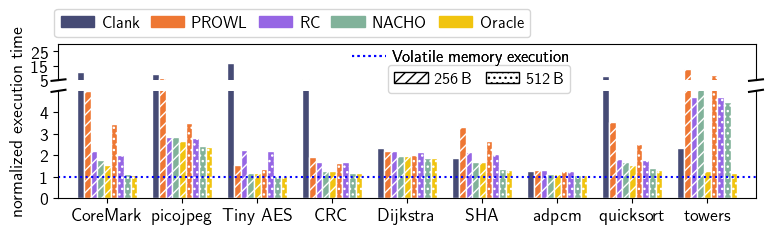

In [14]:

# Execution time plot
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9, 2), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(5, 30)
ax2.set_ylim(0, 5)

configureBrokenPlot(ax, ax2)

dfn.T.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
dfn.T.plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)

applyHatches(Benchmarks, hatches_list, ax)
applyHatches(Benchmarks, hatches_list, ax2)
     
# Line at 1 (norm)
# Average for Ratchet and Opt-All
plain_c_line = ax2.axhline(y = 1.0, color = 'blue', linestyle = ':', label='Volatile memory execution', linewidth=1.5)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['Clank', 'PROWL','RC', 'NACHO', 'Oracle']
config_colors = [ColorScheme['clank'], ColorScheme['prowl'], ColorScheme['replay_cache'], ColorScheme['nacho_pw_stcont'], ColorScheme['nacho_clank']]

legends = []

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=5, bbox_to_anchor = (-0.018, 1.42), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.5);
ax2.add_artist(legend_configs)

# Cache legends
caches = ['256\\,B', '512\\,B']
config_hatches = [cache_256_hatch, cache_512_hatch]

# Config legend

handles = []
for idx, l in enumerate(caches):
    handles.append(Patch(label=l, hatch=config_hatches[idx], facecolor='none', edgecolor='black'))
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (0.46, 0.9), 
                           fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.4)
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Normalized Plain C legend
handles = []
handles.append(plain_c_line)
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=1, bbox_to_anchor = (0.40, 1.1), 
                           fancybox=True, frameon=False, fontsize=12, columnspacing=0.8, handletextpad=0.4)
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Plotting
#ax.set_ylabel("normalized execution time")
fig.text(0.08, 0.5, 'normalized execution time', ha='center', va='center', rotation='vertical')

ax.set_yticks([5, 15, 25])
ax2.set_yticks([0, 1, 2, 3, 4])

plt.subplots_adjust(hspace=0.15)

plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [15]:
# Save the figure
ax2.get_figure().savefig('plots/benchmark-execution-time.pdf', bbox_inches='tight')

## Power Failure Comparison

In [16]:
PlotBenchmarks = Benchmarks[:len(Benchmarks) - 3]

def getPlotDataCR(pd, benchmark, config, cache, postfix='', opt_level=''):
    if postfix == '' and opt_level == '':
        key = config+'-'+cache
    elif postfix == '' and opt_level != '':
        key = config+'-'+cache+opt_level
    else:
        key = config+'-'+cache+postfix+"-final"

    if key not in pd[benchmark]:
        pd[benchmark][key] = {}

    if postfix == '' and opt_level == '':
        pd[benchmark][key] = Results[benchmark][config][cache]["checkpoint_cycles"] + Results[benchmark][config][cache]["restore_cycles"]
        if config == "replay_cache":
            pd[benchmark][key] += Results[benchmark][config][cache]["cache_fence_wait_cycles"]
    elif postfix == '' and opt_level != '':
        pd[benchmark][key] = Results[benchmark][config][cache+opt_level]["checkpoint_cycles"] + Results[benchmark][config][cache+opt_level]["restore_cycles"]
        if config == "replay_cache":
            pd[benchmark][key] += Results[benchmark][config][cache+opt_level]["cache_fence_wait_cycles"]
    else:
        pd[benchmark][key] = Results[benchmark][config][cache+postfix+"-final"]["checkpoint_cycles"] + Results[benchmark][config][cache+postfix+"-final"]["restore_cycles"]
        if config == "replay_cache":
            pd[benchmark][key] += Results[benchmark][config][cache+postfix+"-final"]["cache_fence_wait_cycles"]

PlotDataCR = {}
PlotDataCRPF250000 = {}
PlotDataCRPF500000 = {}
PlotDataCRPF2500000 = {}
PlotDataCRPF5000000 = {}
PlotDataCRPF25000000 = {}
for benchmark in PlotBenchmarks:
    PlotDataCR[benchmark] = {}
    PlotDataCRPF250000[benchmark] = {}
    PlotDataCRPF500000[benchmark] = {}
    PlotDataCRPF2500000[benchmark] = {}
    PlotDataCRPF5000000[benchmark] = {}
    PlotDataCRPF25000000[benchmark] = {}

    getPlotDataCR(PlotDataCR, benchmark, 'clank', '0-0')
    getPlotDataCR(PlotDataCR, benchmark, 'prowl', '256-2')
    getPlotDataCR(PlotDataCR, benchmark, 'replay_cache', '256-2')
    getPlotDataCR(PlotDataCR, benchmark, 'nacho_pw_stcont', '256-2')
    getPlotDataCR(PlotDataCR, benchmark, 'nacho_clank', '256-2')
    getPlotDataCR(PlotDataCR, benchmark, 'prowl', '512-2')
    getPlotDataCR(PlotDataCR, benchmark, 'replay_cache', '512-2')
    getPlotDataCR(PlotDataCR, benchmark, 'nacho_pw_stcont', '512-2')
    getPlotDataCR(PlotDataCR, benchmark, 'nacho_clank', '512-2')
    
    getPlotDataCR(PlotDataCRPF250000, benchmark, 'clank', '0-0', getPostfix(250000))
    getPlotDataCR(PlotDataCRPF250000, benchmark, 'prowl', power_failure_cache, getPostfix(250000))
    getPlotDataCR(PlotDataCRPF250000, benchmark, 'replay_cache', power_failure_cache, getPostfix(250000, 0))
    getPlotDataCR(PlotDataCRPF250000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(250000))
    
    getPlotDataCR(PlotDataCRPF500000, benchmark, 'clank', '0-0', getPostfix(500000))
    getPlotDataCR(PlotDataCRPF500000, benchmark, 'prowl', power_failure_cache, getPostfix(500000))
    getPlotDataCR(PlotDataCRPF500000, benchmark, 'replay_cache', power_failure_cache, getPostfix(500000, 0))
    getPlotDataCR(PlotDataCRPF500000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(500000))
    
    getPlotDataCR(PlotDataCRPF2500000, benchmark, 'clank', '0-0', getPostfix(2500000))
    getPlotDataCR(PlotDataCRPF2500000, benchmark, 'prowl', power_failure_cache, getPostfix(2500000))
    getPlotDataCR(PlotDataCRPF2500000, benchmark, 'replay_cache', power_failure_cache, getPostfix(2500000, 0))
    getPlotDataCR(PlotDataCRPF2500000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(2500000))
    
    getPlotDataCR(PlotDataCRPF5000000, benchmark, 'clank', '0-0', getPostfix(5000000))
    getPlotDataCR(PlotDataCRPF5000000, benchmark, 'prowl', power_failure_cache, getPostfix(5000000))
    getPlotDataCR(PlotDataCRPF5000000, benchmark, 'replay_cache', power_failure_cache, getPostfix(5000000, 0))
    getPlotDataCR(PlotDataCRPF5000000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(5000000))
    
    getPlotDataCR(PlotDataCRPF25000000, benchmark, 'clank', '0-0', getPostfix(25000000))
    getPlotDataCR(PlotDataCRPF25000000, benchmark, 'prowl', power_failure_cache, getPostfix(25000000))
    getPlotDataCR(PlotDataCRPF25000000, benchmark, 'replay_cache', power_failure_cache, getPostfix(25000000, 0))
    getPlotDataCR(PlotDataCRPF25000000, benchmark, 'nacho_pw_stcont', power_failure_cache, getPostfix(25000000))

#PlotData
PlotDataDFCR = pd.DataFrame.from_dict(PlotDataCR)

PlotDataDFCRPF250000 = pd.DataFrame.from_dict(PlotDataCRPF250000)
PlotDataDFCRPF500000 = pd.DataFrame.from_dict(PlotDataCRPF500000)
PlotDataDFCRPF2500000 = pd.DataFrame.from_dict(PlotDataCRPF2500000)
PlotDataDFCRPF5000000 = pd.DataFrame.from_dict(PlotDataCRPF5000000)
PlotDataDFCRPF25000000 = pd.DataFrame.from_dict(PlotDataCRPF25000000)

In [17]:
# Normalize
dfn = PlotDataDFPF250000.copy()
dfnCR = PlotDataDFCRPF250000.copy()

norm_config = 'plain_c-0-0'

for benchmark in PlotBenchmarks:
    norm_value = dfn[benchmark][norm_config]
    dfn[benchmark] = dfn[benchmark]/norm_value
    dfnCR[benchmark] = dfnCR[benchmark]/norm_value
    dfn[benchmark] -= dfnCR[benchmark]

dfn = dfn.drop('plain_c-0-0')

# Rename
dfn = dfn.rename(columns=BenchmarkNameMap)
dfnCR = dfnCR.rename(columns=BenchmarkNameMap)

dfn = pd.concat([dfn, dfnCR], keys=["compute", "overhead"], names=["type", "file"])
# dfn = dfn.swaplevel()

# dfn = pd.pivot_table(dfn, index=["file", "type"], values=dfn.columns.to_list())
# dfn = dfn.unstack(level=-1)
dfn = dfn.drop(["adpcm", "quicksort", "towers"], axis=1)

In [18]:
# Colors
color_list = []
for config in dfn.T:
    print(config)
    stripped_config = config[1].split('-')[0]
    color_list += [ColorScheme[stripped_config]]
    
color_list

('compute', 'clank-0-0-125000-250000-final')
('compute', 'prowl-512-2-125000-250000-final')
('compute', 'replay_cache-512-2-0-250000-final')
('compute', 'nacho_pw_stcont-512-2-125000-250000-final')
('overhead', 'clank-0-0-125000-250000-final')
('overhead', 'prowl-512-2-125000-250000-final')
('overhead', 'replay_cache-512-2-0-250000-final')
('overhead', 'nacho_pw_stcont-512-2-125000-250000-final')


['#464B75',
 '#ee7733',
 '#9666E4',
 '#81b29a',
 '#464B75',
 '#ee7733',
 '#9666E4',
 '#81b29a']

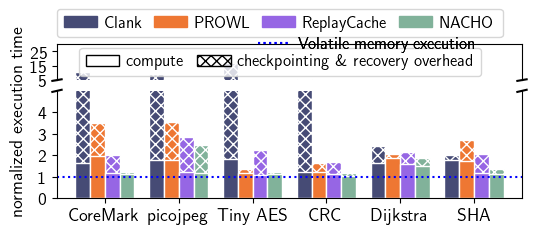

In [19]:
# Execution time plot
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 2), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(5, 30)
ax2.set_ylim(0, 5)

configureBrokenPlot(ax, ax2)

BarStack = [
    'compute',
    'overhead'
]

HatchMap = {
    'compute': '',
    'overhead': 'xxx'
}

def patchwork(axis, hatch):
    for bar in axis.patches:
        if bar.get_hatch() == None: 
            bar.set_hatch(hatch)

def plot_bar(N, axis):
    D = dfn.T[BarStack[0]]
    for n in range(1, N+1):
        D = D + dfn.T[BarStack[n]]
        
    #D.T.plot(kind='bar', ax=ax2, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)
    D.plot(kind='bar', ax=axis, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)

    #patchwork(ax2, HatchMap[BarStack[N]])
    patchwork(axis, HatchMap[BarStack[N]])


# Plot the overlapping bars
plot_bar(1, ax)
plot_bar(0, ax)
plot_bar(1, ax2)
plot_bar(0, ax2)


# dfn.T.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)
# dfn.T.plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)
# dfn.T[("compute")].plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
# dfn.T[("recovery")].plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, hatch="//")
# dfn.T[("compute")].plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
# dfn.T[("recovery")].plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, hatch="//")
# dfn.T[("nacho_pw_stcont-512-2-125000-250000-final", "recovery")].plot(kind='bar', ax=ax2, legend=None, width=0.8, color="#81b29a", edgecolor='white', linewidth=1)
# dfn.T["prowl-512-2-125000-250000-final"].plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)
# dfn.T["replay_cache-512-2-0-250000-final"].plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)
# dfn.T["nacho_pw_stcont-512-2-125000-250000-final"].plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)
# dfnCR.T.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1, stacked=True)

# applyHatches(Benchmarks, hatches_list, ax)
# applyHatches(Benchmarks, hatches_list, ax2)
     
# Line at 1 (norm)
# Average for Ratchet and Opt-All
plain_c_line = ax2.axhline(y = 1.0, color = 'blue', linestyle = ':', label='Volatile memory execution', linewidth=1.5)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['Clank', 'PROWL', 'ReplayCache', 'NACHO']
config_colors = [ColorScheme['clank'], ColorScheme['prowl'], ColorScheme['replay_cache'], ColorScheme['nacho_pw_stcont']]

legends = []

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.018, 1.42), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.5)
ax2.add_artist(legend_configs)

# Cache legends
caches = ['compute', 'checkpointing \& recovery overhead']
config_hatches = ["", "xxx"]

# Config legend

handles = []
for idx, l in enumerate(caches):
    handles.append(Patch(label=l, hatch=config_hatches[idx], facecolor='none', edgecolor='black'))
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (0.03, 1.06), 
                           fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.4);
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Normalized Plain C legend
handles = []
handles.append(plain_c_line)
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=1, bbox_to_anchor = (0.40, 1.22), 
                           fancybox=True, frameon=False, fontsize=12, columnspacing=0.8, handletextpad=0.4);
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Plotting
#ax.set_ylabel("normalized execution time")
fig.text(0.06, 0.5, 'normalized execution time', ha='center', va='center', rotation='vertical')

ax.set_yticks([5, 15, 25])
ax2.set_yticks([0, 1, 2, 3, 4])

plt.subplots_adjust(hspace=0.15)

plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [20]:
# Save the figure
ax2.get_figure().savefig('plots/benchmark-power-failure.pdf', bbox_inches='tight')

## Optimization level comparison

In [21]:
# Normalize
dfn = PlotDataDFO3.copy()

norm_config = 'plain_c-0-0-O3'

for benchmark in Benchmarks:
    norm_value = dfn[benchmark][norm_config]
    dfn[benchmark] = dfn[benchmark]/norm_value

adfn = dfn.copy()
dfn = dfn.drop('plain_c-0-0-O3')

# Rename
dfn = dfn.rename(columns=BenchmarkNameMap)
dfn

,CoreMark,picojpeg,Tiny AES,CRC,Dijkstra,SHA,adpcm,quicksort,towers
clank-0-0-O3,11.301464,7.030662,11.521038,8.641009,1.977509,1.628466,1.258692,7.751192,2.339575
prowl-512-2-O3,3.549232,3.446481,1.614397,2.133036,2.090962,2.704918,1.252434,2.540216,8.568968
replay_cache-512-2-O3,1.991652,2.591622,1.941690,2.043426,1.792292,2.032131,1.330875,1.794441,4.647222
nacho_pw_stcont-512-2-O3,1.115071,2.759422,1.098676,1.274252,1.928581,1.465907,1.078384,1.388361,4.407711


In [22]:
# Colors
color_list = []
for config in dfn.T:
    stripped_config = config.split('-')[0]
    color_list += [ColorScheme[stripped_config]]
    
color_list

['#464B75', '#ee7733', '#9666E4', '#81b29a']

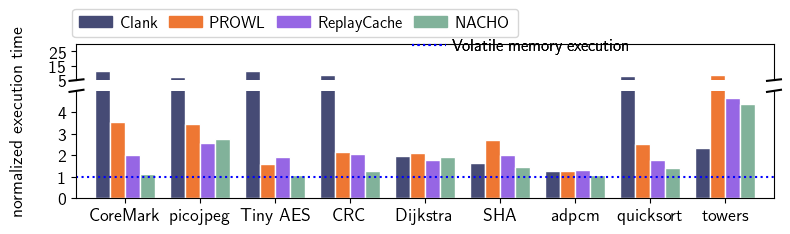

In [23]:
# Execution time plot
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(9, 2), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(5, 30)
ax2.set_ylim(0, 5)

configureBrokenPlot(ax, ax2)

dfn.T.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
dfn.T.plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)

# applyHatches(Benchmarks, hatches_list, ax)
# applyHatches(Benchmarks, hatches_list, ax2)
     
# Line at 1 (norm)
# Average for Ratchet and Opt-All
plain_c_line = ax2.axhline(y = 1.0, color = 'blue', linestyle = ':', label='Volatile memory execution', linewidth=1.5)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['Clank', 'PROWL', 'ReplayCache', 'NACHO']
config_colors = [ColorScheme['clank'], ColorScheme['prowl'], ColorScheme['replay_cache'], ColorScheme['nacho_pw_stcont']]

legends = []

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.018, 1.42), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.5);
ax2.add_artist(legend_configs)

# Cache legends
# caches = ['256\\,B', '512\\,B']
# config_hatches = [cache_256_hatch, cache_512_hatch]

# # Config legend

# handles = []
# for idx, l in enumerate(caches):
#     handles.append(Patch(label=l, hatch=config_hatches[idx], facecolor='none', edgecolor='black'))
# cache_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (0.55, 1), 
#                            fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.4);
# ax2.add_artist(cache_configs)
# legends.append(cache_configs)

# Normalized Plain C legend
handles = []
handles.append(plain_c_line)
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=1, bbox_to_anchor = (0.46, 1.2), 
                           fancybox=True, frameon=False, fontsize=12, columnspacing=0.8, handletextpad=0.4);
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Plotting
#ax.set_ylabel("normalized execution time")
fig.text(0.06, 0.5, 'normalized execution time', ha='center', va='center', rotation='vertical')

ax.set_yticks([5, 15, 25])
ax2.set_yticks([0, 1, 2, 3, 4])

plt.subplots_adjust(hspace=0.15)

plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()

In [24]:
# Save the figure
ax2.get_figure().savefig('plots/benchmark-execution-time-O3-512.pdf', bbox_inches='tight')

# Checkpoints

In [25]:
# Checkpoint plot

PlotBenchmarks = Benchmarks#[:len(Benchmarks) - 3]
PlotConfigurations = BaseConfigurations

EntryToPlot='checkpoint'

def getPlotData(PlotData, benchmark, config, cache):
    key = config+'-'+cache
    if key not in PlotData[benchmark]:
        PlotData[benchmark][key] = {}
        
    PlotData[benchmark][config+'-'+cache] = Results[benchmark][config][cache][EntryToPlot]
    
PlotData = {}
for benchmark in PlotBenchmarks:
    PlotData[benchmark] = {}
    
    getPlotData(PlotData, benchmark, 'clank', '0-0')

    # getPlotData(PlotData, benchmark, 'replay_cache', '256-2')
    # getPlotData(PlotData, benchmark, 'replay_cache', '512-2')
    
    getPlotData(PlotData, benchmark, 'prowl', '256-2')
    getPlotData(PlotData, benchmark, 'prowl', '512-2')
    
    getPlotData(PlotData, benchmark, 'nacho_pw_stcont', '256-2')
    getPlotData(PlotData, benchmark, 'nacho_pw_stcont', '512-2')
    
    getPlotData(PlotData, benchmark, 'nacho_clank', '256-2')
    getPlotData(PlotData, benchmark, 'nacho_clank', '512-2')
    
    
#PlotData
PlotDataDF = pd.DataFrame.from_dict(PlotData)


In [26]:
# Normalize
dfn = PlotDataDF.copy()

norm_config = 'clank-0-0'

for benchmark in PlotBenchmarks:
    norm_value = dfn[benchmark][norm_config]
    if norm_value != 0:
        dfn[benchmark] = dfn[benchmark]/norm_value

# Rename
dfn = dfn.rename(columns=BenchmarkNameMap)
dfn.T

,clank-0-0,prowl-256-2,prowl-512-2,nacho_pw_stcont-256-2,nacho_pw_stcont-512-2,nacho_clank-256-2,nacho_clank-512-2
CoreMark,1.0,0.254053,0.143422,0.034744,0.004316,0.019176,0.003371
picojpeg,1.0,0.470321,0.197064,0.200518,0.160169,0.180397,0.152985
Tiny AES,1.0,0.015315,0.007333,0.006030,0.002284,0.005708,0.002121
CRC,1.0,0.107280,0.061303,0.022989,0.011494,0.022989,0.011494
Dijkstra,1.0,0.323753,0.199394,0.484912,0.405276,0.465179,0.390559
SHA,1.0,4.052206,2.280643,0.762740,0.375402,0.762636,0.252932
adpcm,1.0,2.715762,1.399087,1.644402,0.657617,1.480058,0.493272
quicksort,1.0,0.218680,0.107088,0.059714,0.023957,0.044853,0.017833
towers,0.0,40062.000000,25581.000000,16018.000000,12870.000000,0.000000,0.000000


In [27]:
# Colors
color_list = []
for config in dfn.T:
    stripped_config = config.split('-')[0]
    color_list += [ColorScheme[stripped_config]]
    
color_list

['#464B75', '#ee7733', '#ee7733', '#81b29a', '#81b29a', '#F1C40F', '#F1C40F']

In [28]:
# Hatches
cache_256_hatch = '///'
cache_512_hatch = '...'

hatches_list = []
for config in dfn.T:
    cache_size = config.split('-')[1]
    hatch = ''
    
    if cache_size == '256':
        hatch = cache_256_hatch
    elif cache_size == '512':
        hatch = cache_512_hatch

    hatches_list += [hatch]

hatches_list

['', '///', '...', '///', '...', '///', '...']

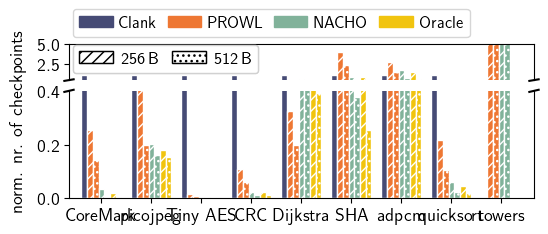

In [29]:
# Checkpoint plot

# Two plots for broken Y axis
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 2), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(0.4, 5)
ax2.set_ylim(0, 0.4)

configureBrokenPlot(ax, ax2)

bottom = dfn.T.plot(ax=ax2, kind='bar', legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
top = dfn.T.plot(ax=ax, logy=False, kind='bar', legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)

applyHatches(PlotBenchmarks, hatches_list, ax)
applyHatches(PlotBenchmarks, hatches_list, ax2)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['Clank', 'PROWL','NACHO', 'Oracle']
config_colors = [ColorScheme['clank'], ColorScheme['prowl'], ColorScheme['nacho_pw_stcont'], ColorScheme['nacho_clank']]

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.01, 1.42), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.4);
ax2.add_artist(legend_configs)

# Cache legends
caches = ['256\\,B', '512\\,B']
config_hatches = [cache_256_hatch, cache_512_hatch]

# Config legend
handles = []
for idx, l in enumerate(caches):
    handles.append(Patch(label=l, hatch=config_hatches[idx], facecolor='none', edgecolor='black'))
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.01, 1.09), 
                           fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.5);
ax2.add_artist(cache_configs)

# Plotting
fig.text(0.04, 0.50, 'norm. nr. of checkpoints', ha='center', va='center', rotation='vertical')

# ax.set_yticks([0.4, 2 ,4])
# ax2.set_yticks([0, 0.1, 0.2, 0.3])


plt.xticks(rotation=0)
plt.subplots_adjust(hspace=0.15)
plt.show()

In [30]:
# Save the figure
ax2.get_figure().savefig('plots/benchmark-checkpoints.pdf', bbox_inches='tight')

# Volatile (Cache) Accesses

In [31]:
cache_size = '512-2'
Entries = [
    'cache_read',
    'cache_write',
    'cache_cuckoo',
    'cache_checkpoint'
]

PlotBenchmarks = Benchmarks[:len(Benchmarks) - 3]
PlotConfigurations = [
    'prowl',
    'replay_cache',
    'nacho_pw_stcont',
    'nacho_clank'
]

NormConfig = 'nacho_pw_stcont'

# Normalize per benchmark to nacho_clank total number
NormValue = {}
for benchmark in Benchmarks:
    NormValue[benchmark] = 0
    for entry in Entries:
        NormValue[benchmark] += Results[benchmark][NormConfig][cache_size][entry]

def getPlotData(PlotData, entry, benchmark, config, cache):
    if config not in PlotData[entry][benchmark]:
        PlotData[entry][benchmark][config] = {}
    PlotData[entry][benchmark][config] = Results[benchmark][config][cache][entry] / NormValue[benchmark]


PlotData = {}
for entry in Entries:
    PlotData[entry] = {}
    
    for benchmark in PlotBenchmarks:
        PlotData[entry][benchmark] = {}
        
        #getPlotData(PlotData, entry, benchmark, 'clank', '0-0')
        getPlotData(PlotData, entry, benchmark, 'prowl', cache_size)
        getPlotData(PlotData, entry, benchmark, 'replay_cache', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_pw_stcont', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_clank', cache_size)
    
#PlotData
PlotDataDF = {}
for entry in Entries:
    PlotDataDF[entry] = pd.DataFrame.from_dict(PlotData[entry]).rename(columns=BenchmarkNameMap)

print('cache_read')
print(PlotDataDF['cache_read'])

print('cache_write')
print(PlotDataDF['cache_write'])

print('cache_checkpoint')
print(PlotDataDF['cache_checkpoint'])

print('cache_cuckoo')
print(PlotDataDF['cache_cuckoo'])

cache_read
                 CoreMark  picojpeg  Tiny AES       CRC  Dijkstra       SHA
prowl            0.752389  0.579140  0.645955  0.390419  0.494772  0.680853
replay_cache     0.655018  0.537366  0.533857  0.379990  0.494169  0.663107
nacho_pw_stcont  0.641264  0.521415  0.519935  0.372821  0.490293  0.661534
nacho_clank      0.641264  0.521415  0.519935  0.372821  0.490293  0.661534
cache_write
                 CoreMark  picojpeg  Tiny AES       CRC  Dijkstra       SHA
prowl            0.724229  0.561817  0.595551  0.554180  0.508304  0.418795
replay_cache     0.346237  0.438530  0.429487  0.504644  0.494828  0.269322
nacho_pw_stcont  0.332417  0.411734  0.420179  0.496171  0.489553  0.267749
nacho_clank      0.332417  0.411734  0.420179  0.496171  0.489553  0.267749
cache_checkpoint
                 CoreMark  picojpeg  Tiny AES       CRC  Dijkstra       SHA
prowl            0.094801  0.127893  0.073071  0.205312  0.015663  0.197332
replay_cache     0.000000  0.000000  0.000000  0

In [32]:
# Overhead difference for Volatile accesses
OverheadMem = PlotDataDF['cache_read'] + PlotDataDF['cache_write'] + PlotDataDF['cache_checkpoint'] + PlotDataDF['cache_cuckoo']

print('Difference cache memory')
print(OverheadMem)

# Difference in perc between nacho and prowl
OverheadNacho = (OverheadMem.T['nacho_pw_stcont']-OverheadMem)/OverheadMem*100

print('')
print('Overhead difference Nacho comapred to Prowl')
print(OverheadNacho.T['prowl'])
print('Avg:',OverheadNacho.T['prowl'].mean())
print('Max:',OverheadNacho.T['prowl'].min()) 

print('')
print('Overhead difference Nacho comapred to Nacho Oracle')
print(OverheadNacho.T['nacho_clank'])
print('Avg:',OverheadNacho.T['nacho_clank'].mean())
print('Max:',OverheadNacho.T['nacho_clank'].min()) 

print('')
print('Overhead difference Nacho comapred to ReplayCache')
print(OverheadNacho.T['replay_cache'])
print('Avg:',OverheadNacho.T['replay_cache'].mean())
print('Max:',OverheadNacho.T['replay_cache'].min()) 

Difference cache memory
                 CoreMark  picojpeg  Tiny AES       CRC  Dijkstra       SHA
prowl            3.541103  2.658331  2.579789  2.284667  1.769672  2.556541
replay_cache     1.082077  1.115166  1.327636  1.047091  1.025280  1.024382
nacho_pw_stcont  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
nacho_clank      0.995086  0.995662  0.999602  0.999348  0.999124  0.991533

Overhead difference Nacho comapred to Prowl
CoreMark   -71.760215
picojpeg   -62.382407
Tiny AES   -61.237135
CRC        -56.229941
Dijkstra   -43.492358
SHA        -60.884646
Name: prowl, dtype: float64
Avg: -59.3311169372653
Max: -71.76021532624873

Overhead difference Nacho comapred to Nacho Oracle
CoreMark    0.493807
picojpeg    0.435740
Tiny AES    0.039795
CRC         0.065221
Dijkstra    0.087714
SHA         0.853944
Name: nacho_clank, dtype: float64
Avg: 0.32937010008241047
Max: 0.039795007955028744

Overhead difference Nacho comapred to ReplayCache
CoreMark    -7.585141
picojpeg

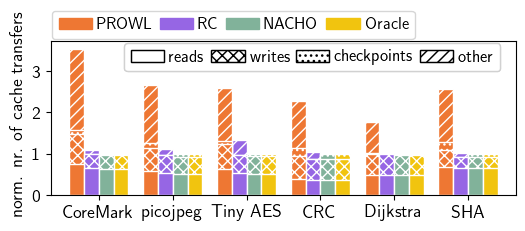

In [33]:
BarStack = [
    'cache_read',
    'cache_write',
    'cache_checkpoint',
    'cache_cuckoo'
]

HatchMap = {
    'cache_read': '',
    'cache_write': 'xxx',
    'cache_checkpoint': '...',
    'cache_cuckoo': '///'
}

# Colors
color_list = []
for config in PlotConfigurations:
    color_list += [ColorScheme[config]]
    
fig = plt.figure(figsize=(6, 2))
ax = fig.add_subplot(111)

def patchwork(ax, hatch):
    for bar in ax.patches:
        if bar.get_hatch() == None: 
            bar.set_hatch(hatch)

def plot_bar(N):
    D = PlotDataDF[BarStack[0]]
    for n in range(1, N+1):
        D = D + PlotDataDF[BarStack[n]]
        
    #D.T.plot(kind='bar', ax=ax2, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)
    D.T.plot(kind='bar', ax=ax, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)

    #patchwork(ax2, HatchMap[BarStack[N]])
    patchwork(ax, HatchMap[BarStack[N]])


# Plot the overlapping bars
plot_bar(3)
plot_bar(2)
plot_bar(1)
plot_bar(0)

# Custom legend
configs = ['PROWL', 'RC','NACHO', 'Oracle']
config_colors = [ColorScheme['prowl'], ColorScheme["replay_cache"], ColorScheme['nacho_pw_stcont'], ColorScheme['nacho_clank']]

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
    
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.016, 0.96), 
                            fancybox=True, fontsize=12, columnspacing=0.4, handletextpad=0.3);
ax.add_artist(legend_configs)

handles = []
hlw=1
handles.append(Patch(label='reads', hatch=HatchMap['cache_read'],
                     facecolor='none', edgecolor='black', linewidth=hlw))
handles.append(Patch(label='writes', hatch=HatchMap['cache_write'],
                     facecolor='none', edgecolor='black', linewidth=hlw))
handles.append(Patch(label='checkpoints', hatch=HatchMap['cache_checkpoint'],
                     facecolor='none', edgecolor='black', linewidth=hlw))
handles.append(Patch(label='other', hatch=HatchMap['cache_cuckoo'],
                     facecolor='none', edgecolor='black', linewidth=hlw))

legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (0.14, 0.75), 
                            fancybox=True, fontsize=12, columnspacing=0.4, handletextpad=0.3);
ax.add_artist(legend_configs)



# Show the plot
plt.xticks(rotation=0)
#plt.tight_layout()

fig.text(0.07, 0.52, 'norm. nr. of cache transfers', ha='center', va='center', rotation='vertical')
# ax.set_ylabel('norm. nr. of cache accesses', y=0.6)

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax.set_yticks([0, 1, 2, 3])
#ax2.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0,])
plt.show()

In [34]:
# Save the figure
ax.get_figure().savefig('plots/benchmark-volatile-accesses.pdf', bbox_inches='tight')

# NVM Access

In [35]:
# Checkpoint plot
cache_size = '512-2'
Entries = [
    'nvm_writes',
    'nvm_reads',
]

PlotBenchmarks = Benchmarks#[:len(Benchmarks) - 3]
PlotConfigurations = [
    'clank',
    'prowl',
    'replay_cache',
    'nacho_pw_stcont',
    'nacho_clank',
]


NormConfig = 'clank'

# Normalize per benchmark to nacho_clank total number
NormValue = {}
for benchmark in Benchmarks:
    NormValue[benchmark] = 0
    for entry in Entries:
        NormValue[benchmark] += Results[benchmark][NormConfig]['0-0'][entry]

def getPlotData(PlotData, entry, benchmark, config, cache):
    if config not in PlotData[entry][benchmark]:
        PlotData[entry][benchmark][config] = {}
    PlotData[entry][benchmark][config] = Results[benchmark][config][cache][entry] / NormValue[benchmark]


PlotData = {}
for entry in Entries:
    PlotData[entry] = {}
    
    for benchmark in PlotBenchmarks:
        PlotData[entry][benchmark] = {}
        
        getPlotData(PlotData, entry, benchmark, 'clank', '0-0')
        getPlotData(PlotData, entry, benchmark, 'prowl', cache_size)
        getPlotData(PlotData, entry, benchmark, 'replay_cache', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_pw_stcont', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_clank', cache_size)
    
#PlotData
PlotDataDF = {}
for entry in Entries:
    PlotDataDF[entry] = pd.DataFrame.from_dict(PlotData[entry]).rename(columns=BenchmarkNameMap)


PlotDataDF['nvm_writes']

,CoreMark,picojpeg,Tiny AES,CRC,Dijkstra,SHA,adpcm,quicksort,towers
clank,0.640197,0.643187,0.660994,0.661189,0.433412,0.363111,0.190667,0.556415,0.507059
prowl,0.105206,0.150426,0.007800,0.062551,0.090752,0.757935,0.310527,0.085846,2.116318
replay_cache,0.023688,0.057478,0.019409,0.035636,0.106677,0.248881,0.180053,0.039628,0.507059
nacho_pw_stcont,0.006751,0.111557,0.003845,0.021768,0.164096,0.188547,0.202183,0.027151,1.074865
nacho_clank,0.005646,0.106680,0.003737,0.021732,0.158392,0.157466,0.175675,0.021671,0.038868


In [36]:
# Overhead difference for NVM accesses
OverheadMem = PlotDataDF['nvm_writes'] + PlotDataDF['nvm_reads']

print('Difference NVM memory')
print(OverheadMem)

# Difference in perc between nacho and prowl
OverheadNacho = (OverheadMem.T['nacho_pw_stcont']-OverheadMem)/OverheadMem*100

print('')
print('Overhead difference Nacho comapred to Prowl')
print(OverheadNacho.T['prowl'])
print('Avg:',OverheadNacho.T['prowl'].mean())
print('Max:',OverheadNacho.T['prowl'].min()) 

print('')
print('Overhead difference Nacho comapred to Clank')
print(OverheadNacho.T['clank'])
print('Avg:',OverheadNacho.T['clank'].mean())
print('Max:',OverheadNacho.T['clank'].min()) 

print('')
print('Overhead difference Nacho comapred to ReplayCache')
print(OverheadNacho.T['replay_cache'])
print('Avg:',OverheadNacho.T['replay_cache'].mean())
print('Max:',OverheadNacho.T['replay_cache'].min()) 

print('')
print('Overhead difference Nacho comapred to Nacho Oracle')
print(OverheadNacho.T['nacho_clank'])
print('Avg:',OverheadNacho.T['nacho_clank'].mean())
print('Max:',OverheadNacho.T['nacho_clank'].min()) 



Difference NVM memory
                 CoreMark  picojpeg  Tiny AES       CRC  Dijkstra       SHA  \
clank            1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
prowl            0.189287  0.254658  0.015911  0.103334  0.407306  1.331394   
replay_cache     0.026387  0.070405  0.019809  0.041820  0.365955  0.314810   
nacho_pw_stcont  0.012712  0.177889  0.006131  0.038639  0.502982  0.348407   
nacho_clank      0.010955  0.170370  0.005962  0.038567  0.494205  0.299111   

                    adpcm  quicksort    towers  
clank            1.000000   1.000000  1.000000  
prowl            0.667860   0.156217  3.274317  
replay_cache     0.307535   0.048725  0.511457  
nacho_pw_stcont  0.419484   0.048428  1.647847  
nacho_clank      0.375873   0.039995  0.076976  

Overhead difference Nacho comapred to Prowl
CoreMark    -93.284014
picojpeg    -30.145816
Tiny AES    -61.468985
CRC         -62.608094
Dijkstra     23.490081
SHA         -73.831414
adpcm       -37.189791
qui

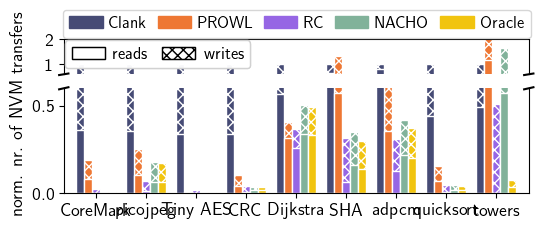

In [37]:
BarStack = [
    'nvm_reads',
    'nvm_writes',
]

HatchMap = {
    'nvm_reads': '',
    'nvm_writes': 'xxx',
}

# Colors
color_list = []
for config in PlotConfigurations:
    color_list += [ColorScheme[config]]
    
#fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4), gridspec_kw={'height_ratios': [1, 2.5]})
# ax = plt.figure(figsize=(6, 2)).add_subplot(111)

fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 2), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(0.6, 2)
ax2.set_ylim(0, 0.6)

configureBrokenPlot(ax, ax2)

def patchwork(axis, hatch):
    for bar in axis.patches:
        if bar.get_hatch() == None: 
            bar.set_hatch(hatch)

def plot_bar(N):
    D = PlotDataDF[BarStack[0]]
    for n in range(1, N+1):
        D = D + PlotDataDF[BarStack[n]]
        
    D.T.plot(kind='bar', ax=ax, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)
    patchwork(ax, HatchMap[BarStack[N]])
    D.T.plot(kind='bar', ax=ax2, width=0.8, color=color_list, edgecolor='white', legend=None, linewidth=1)
    patchwork(ax2, HatchMap[BarStack[N]])


# Plot the overlapping bars
plot_bar(1)
plot_bar(0)

# Custom legend
configs = ['Clank', 'PROWL', 'RC','NACHO', 'Oracle']
config_colors = [ColorScheme['clank'], ColorScheme['prowl'], ColorScheme['replay_cache'], ColorScheme['nacho_pw_stcont'], ColorScheme['nacho_clank']]

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=5, bbox_to_anchor = (-0.020, 1.40), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.4);
ax2.add_artist(legend_configs)

handles = []
hlw=1
handles.append(Patch(label='reads', hatch=HatchMap['nvm_reads'],
                     facecolor='none', edgecolor='black', linewidth=hlw))
handles.append(Patch(label='writes', hatch=HatchMap['nvm_writes'],
                     facecolor='none', edgecolor='black', linewidth=hlw))

legend_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (-0.015, 1.11), 
                            fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.5);
ax2.add_artist(legend_configs)

# Show the plot
plt.xticks(rotation=0)
#plt.tight_layout(pad=0.3)

#ax.set_ylim(0,0.2)

ax2.set_ylabel("norm. nr. of NVM transfers", y=0.76)

#ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.show()

In [38]:
# Save the figure
ax.get_figure().savefig('plots/benchmark-non-volatile-accesses.pdf', bbox_inches='tight')

# Impact of Different Components of NACHO

In [39]:
#Results

In [40]:
# Checkpoint plot
cache_size = '512-2'
Entries = [
    'cycles',
    'checkpoint',
    'nvm_reads',
    'nvm_writes',
]
#PlotBenchmarks = Benchmarks

NormConfig = 'nacho_naive'

def getPlotData(PlotData, entry, benchmark, config, cache):
    if config not in PlotData[entry][benchmark]:
        PlotData[entry][benchmark][config] = {}
        
    #PlotData[entry][benchmark][config] = -1*(1-(Results[benchmark][config][cache][entry] / Results[benchmark][NormConfig][cache][entry]))
    try:
        PlotData[entry][benchmark][config] = Results[benchmark][config][cache][entry]
    except:
        PlotData[entry][benchmark][config] = 0.0


PlotData = {}
for entry in Entries:
    PlotData[entry] = {}
    
    for benchmark in PlotBenchmarks:
        PlotData[entry][benchmark] = {}
        getPlotData(PlotData, entry, benchmark, 'plain_c', '0-0')

        getPlotData(PlotData, entry, benchmark, 'nacho_naive', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_pw', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_stcont', cache_size)
        getPlotData(PlotData, entry, benchmark, 'nacho_pw_stcont', cache_size)   
        
#PlotData
PlotDataDF = {}
for entry in Entries:
    PlotDataDF[entry] = pd.DataFrame.from_dict(PlotData[entry])

# Compute the overhead
PlotDataDF['overhead'] = PlotDataDF['cycles'] - PlotDataDF['cycles'].T['plain_c']

#print(PlotDataDF['overhead'])

# Normalize everything
for entry in PlotDataDF:
    PlotDataDF[entry] = PlotDataDF[entry] / PlotDataDF[entry].T[NormConfig]

for entry in PlotDataDF:
    print(entry)
    print(PlotDataDF[entry])
    print()

cycles
                 coremark  picojpeg       aes       crc  dijkstra       sha  \
plain_c          0.873349  0.393635  0.945532  0.800855  0.528008  0.574290   
nacho_naive      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
nacho_pw         0.984718  0.980208  0.999944  0.975947  0.991776  0.834065   
nacho_stcont     0.994825  0.964060  0.995191  0.956497  0.999432  0.859610   
nacho_pw_stcont  0.979745  0.960546  0.995128  0.956450  0.991268  0.780323   

                    adpcm  quicksort    towers  
plain_c          0.910154   0.677561  0.191162  
nacho_naive      1.000000   1.000000  1.000000  
nacho_pw         0.979569   0.984265  0.890962  
nacho_stcont     0.999970   0.945049  0.974804  
nacho_pw_stcont  0.979569   0.940699  0.858719  

checkpoint
                 coremark  picojpeg       aes   crc  dijkstra       sha  \
plain_c          0.000000  0.000000  0.000000  0.00  0.000000  0.000000   
nacho_naive      1.000000  1.000000  1.000000  1.00  1.000000 

In [41]:
# Create the latex table holding all the info

Configurations = [
    'nacho_pw',
    'nacho_stcont',
    'nacho_pw_stcont'
]

Entries = [
    'overhead',
    'checkpoint',
    'nvm_reads',
    'nvm_writes',
]

EntryNameMap = {
    'overhead' : 'overhead',
    'checkpoint' : 'checkpoints',
    'nvm_reads' : 'NVM reads',
    'nvm_writes' : 'NVM writes',
}

Format = '{:.0f}'

def convertResult(val):
    return 100-(val * 100);

def toStr(val):
    s = Format.format(val)
    if val < 10:
        s = r'\hphantom{0}' + s
    return s
    
def colorbox(exec_val, t):
    #return t
    perc = exec_val+30
    return r'\colorbox{hightlight!'+str(int(perc))+r'!white}{'+t+r'}'

tex=''
def tex_addl(t):
    global tex
    tex += t + '\n'
    
def tex_add(t):
    global tex
    tex += t
  
tex_addl(r'% table automatically generated by PowertracePlot.ipynb')

tex_addl(r'\begin{tabular}{@{}l|ccccccccccccccccccc@{}}')
tex_addl(r'\toprule')

# Add the benchmark headers
#tex_add(r'test')
for bench in PlotBenchmarks:
    tex_add(r' & \multicolumn{3}{c}{\textbf{\textsf{'+BenchmarkNameMap[bench]+'}}}')
tex_addl(r' \\ \midrule')

# Add the power-fail header
tex_add(r'\textbf{Metric}')
for bench in PlotBenchmarks:
    tex_add(r' & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}}')
tex_addl(r' \\')

for entry in Entries:
    tex_add(EntryNameMap[entry])
    for bench in PlotBenchmarks:
        pw_val = convertResult(PlotDataDF[entry][bench]['nacho_pw'])
        st_val = convertResult(PlotDataDF[entry][bench]['nacho_stcont'])
        pwst_val = convertResult(PlotDataDF[entry][bench]['nacho_pw_stcont'])
        
        pw_val_str = toStr(pw_val)
        st_val_str = toStr(st_val)
        pwst_val_str = toStr(pwst_val)
        
        tex_add(r' & '+pw_val_str+r'\%')
        tex_add(r' & '+st_val_str+r'\%')
        tex_add(r' & \textbf{'+colorbox(pwst_val,pwst_val_str+r'\%}'))
    tex_addl(r' \\')

# Close the table
tex_addl(r' \bottomrule')
tex_addl(r'\end{tabular}')

print(tex)

# Save the table
with open('tables/benchmarks-component-overhead.tex', "w") as f:
    # Writing data to a file
    f.write(tex)

% table automatically generated by PowertracePlot.ipynb
\begin{tabular}{@{}l|ccccccccccccccccccc@{}}
\toprule
 & \multicolumn{3}{c}{\textbf{\textsf{CoreMark}}} & \multicolumn{3}{c}{\textbf{\textsf{picojpeg}}} & \multicolumn{3}{c}{\textbf{\textsf{Tiny AES}}} & \multicolumn{3}{c}{\textbf{\textsf{CRC}}} & \multicolumn{3}{c}{\textbf{\textsf{Dijkstra}}} & \multicolumn{3}{c}{\textbf{\textsf{SHA}}} & \multicolumn{3}{c}{\textbf{\textsf{adpcm}}} & \multicolumn{3}{c}{\textbf{\textsf{quicksort}}} & \multicolumn{3}{c}{\textbf{\textsf{towers}}} \\ \midrule
\textbf{Metric} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \textbf{\textsf{ST}} & \textbf{\textsf{N}} & \textbf{\textsf{PW}} & \

## Comparison of ReplayCache with WT-vCache from the ReplayCache paper

In [42]:
PlotBenchmarks = ['dijkstra', 'sha']
PlotConfigurations = BaseConfigurations

EntryToPlot='cycles'

def getPlotData(PlotData, benchmark, config, cache):
    key = config+'-'+cache
    if key not in PlotData[benchmark]:
        PlotData[benchmark][key] = {}
    
    PlotData[benchmark][config+'-'+cache] = Results[benchmark][config][cache][EntryToPlot]

PlotData = {}
for benchmark in PlotBenchmarks:
    PlotData[benchmark] = {}
    getPlotData(PlotData, benchmark, 'plain_c', '0-0')
    getPlotData(PlotData, benchmark, 'replay_cache_baseline', '8192-2')
    getPlotData(PlotData, benchmark, 'replay_cache', '8192-2')
    
    
#PlotData
PlotDataDF = pd.DataFrame.from_dict(PlotData)
PlotDataDF

,dijkstra,sha
plain_c-0-0,65283080.0,23364940.0
replay_cache_baseline-8192-2,104905696.0,51526968.0
replay_cache-8192-2,107011255.0,47553401.0


In [43]:
# Normalize
dfn = PlotDataDF.copy()

norm_config = 'plain_c-0-0'

for benchmark in PlotBenchmarks:
    norm_value = dfn[benchmark][norm_config]
    dfn[benchmark] = dfn[benchmark]/norm_value

adfn = dfn.copy()
dfn = dfn.drop('plain_c-0-0')

# Rename
dfn = dfn.rename(columns=BenchmarkNameMap)
dfn

,Dijkstra,SHA
replay_cache_baseline-8192-2,1.606935,2.205311
replay_cache-8192-2,1.639188,2.035246


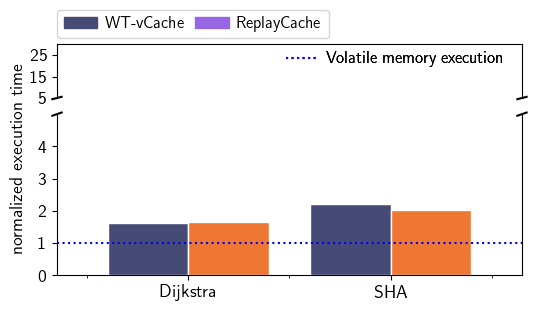

In [44]:
# Execution time plot
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 3), gridspec_kw={'height_ratios': [1, 3]})
ax.set_ylim(5, 30)
ax2.set_ylim(0, 5)

configureBrokenPlot(ax, ax2)

dfn.T.plot(kind='bar', ax=ax, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)
dfn.T.plot(kind='bar', ax=ax2, legend=None, width=0.8, color=color_list, edgecolor='white', linewidth=1)

# applyHatches(PlotBenchmarks, hatches_list, ax)
# applyHatches(PlotBenchmarks, hatches_list, ax2)
     
# Line at 1 (norm)
# Average for Ratchet and Opt-All
plain_c_line = ax2.axhline(y = 1.0, color = 'blue', linestyle = ':', label='Volatile memory execution', linewidth=1.5)

#
# Add custom legend (manual way)
#
 
# Config legend
configs = ['WT-vCache', 'ReplayCache']
config_colors = [ColorScheme['clank'], ColorScheme['replay_cache']]

legends = []

handles = []
for idx, l in enumerate(configs):
    handles.append(Patch(label=l, color=config_colors[idx]))
legend_configs = plt.legend(handles=handles, loc='lower left', ncol=4, bbox_to_anchor = (-0.018, 1.42), 
                            fancybox=True, fontsize=12, columnspacing=0.6, handletextpad=0.5);
ax2.add_artist(legend_configs)

# Cache legends
# caches = ['8192\\,B']
# config_hatches = [cache_256_hatch]

# Config legend

# handles = []
# for idx, l in enumerate(caches):
#     handles.append(Patch(label=l, hatch=config_hatches[idx], facecolor='none', edgecolor='black'))
# cache_configs = plt.legend(handles=handles, loc='lower left', ncol=2, bbox_to_anchor = (0.55, 1), 
#                            fancybox=True, fontsize=12, columnspacing=0.8, handletextpad=0.4);
# ax2.add_artist(cache_configs)
# legends.append(cache_configs)

# Normalized Plain C legend
handles = []
handles.append(plain_c_line)
cache_configs = plt.legend(handles=handles, loc='lower left', ncol=1, bbox_to_anchor = (0.46, 1.2), 
                           fancybox=True, frameon=False, fontsize=12, columnspacing=0.8, handletextpad=0.4);
ax2.add_artist(cache_configs)
legends.append(cache_configs)

# Plotting
#ax.set_ylabel("normalized execution time")
fig.text(0.06, 0.5, 'normalized execution time', ha='center', va='center', rotation='vertical')

ax.set_yticks([5, 15, 25])
ax2.set_yticks([0, 1, 2, 3, 4])

plt.subplots_adjust(hspace=0.15)

plt.xticks(rotation=0)
#plt.tight_layout()
plt.show()